<a href="https://www.kaggle.com/m26102002/titanic-machine-learning?scriptVersionId=86872755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now Get the data

In [3]:
ship = pd.read_csv('../input/titanic/train.csv')

In [4]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA


# Missing Data

<AxesSubplot:>

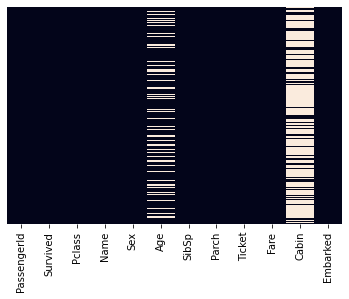

In [5]:
sns.heatmap(ship.isnull(),yticklabels=False,cbar=False)

Roughly 20% of Age Data is Missing.

<AxesSubplot:xlabel='Survived', ylabel='count'>

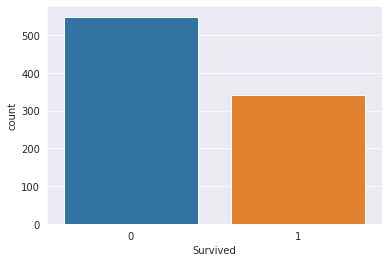

In [6]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = ship)

<AxesSubplot:xlabel='Survived', ylabel='count'>

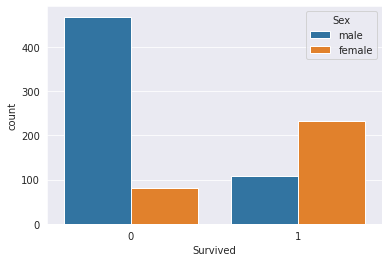

In [7]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = ship,hue = 'Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

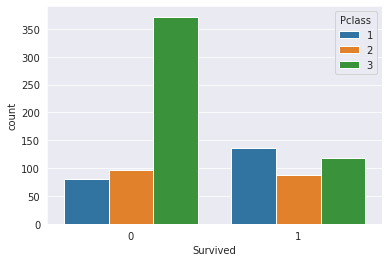

In [8]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived',data = ship,hue = 'Pclass')

<AxesSubplot:xlabel='AGE'>

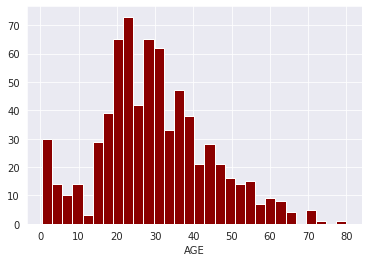

In [9]:
plt.xlabel('AGE')
ship['Age'].hist(bins = 30,color = 'darkred')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

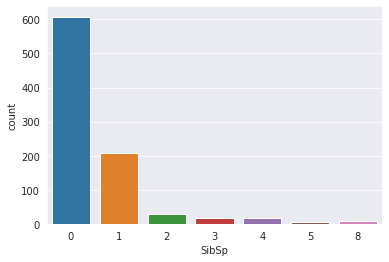

In [10]:
sns.countplot(x = 'SibSp',data = ship)

<AxesSubplot:xlabel='FARE'>

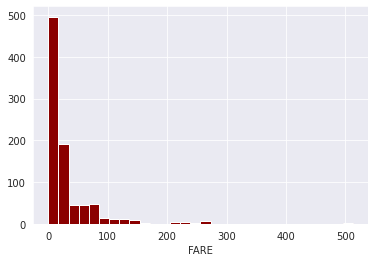

In [11]:
plt.xlabel('FARE')
ship['Fare'].hist(bins = 30,color = 'darkred')

**Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

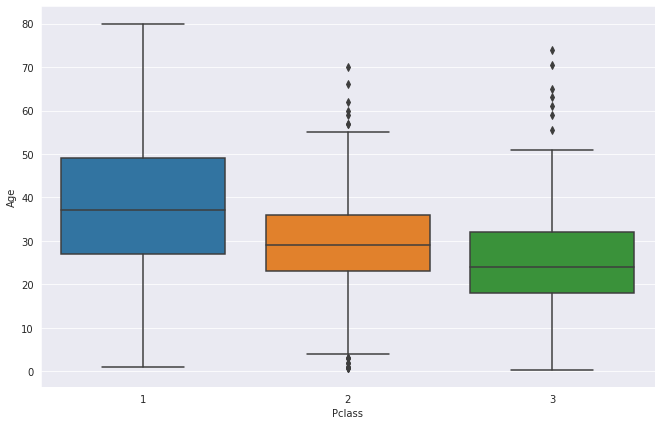

In [12]:
plt.figure(figsize=(11,7))
sns.boxplot(x = 'Pclass',y = 'Age',data = ship)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [13]:
def func(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [14]:
ship['Age'] = ship[['Age','Pclass']].apply(func,axis=1)

Now check the heatmap again

<AxesSubplot:>

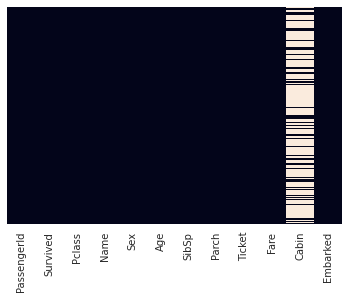

In [15]:
sns.heatmap(ship.isnull(),yticklabels=False,cbar=False)

 Drop the Cabin column and the row in Embarked that is NaN.

In [16]:
ship.drop('Cabin',axis=1,inplace = True)

In [17]:
ship.dropna(inplace=True)

Check the Head

In [18]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Converting Categorical Features

In [19]:
sex = pd.get_dummies(ship['Sex'],drop_first=True)
embark = pd.get_dummies(ship['Embarked'],drop_first=True)

In [20]:
ship.drop(['Sex','Name','Ticket','Embarked'],axis=1,inplace=True)

In [21]:
ship = pd.concat([ship,sex,embark],axis=1)

In [22]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# > Now building a Logistic Model
Train Test Split

# Train test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = ship[['PassengerId','Pclass','Age','SibSp','Parch','Fare','male','Q','S']]
y = ship['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression(max_iter=10000)

In [27]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [28]:
predictions = logmodel.predict(X_test)

# Evaluation

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       184
           1       0.75      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294



In [31]:
print(confusion_matrix(y_test,predictions))

[[156  28]
 [ 26  84]]


Great